# **Eksplorasi Digitalisasi Citra**
Nama  : Muhammad Rafi Fatihul Ihsan;
NIM   : 24343016;
Sesi  : 202523430039

Program mencakup:
1. Akuisisi dan Digitalisasi (memuat file citra)
2. Representasi Matriks dan Vektor
3. Analisis Parameter Citra
4. Manipulasi Dasar (cropping, resizing, flipping)

Import Modul.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **1. Akuisisi dan Digitalisasi (memuat file citra)**
Memuat File Citra dari file lokal. Jika file tidak ditemukan, tampilkan pesan error dan keluar.

In [ ]:
def muat_citra(path):
    if not os.path.isfile(path):
        print("\nERROR: File '{}' tidak ditemukan.".format(path))
        print("Pastikan file berada di direktori yang sama dengan program,")
        print("atau gunakan path absolut.")
        return None
    img = cv2.imread(path)
    if img is None:
        print("\nERROR: Gagal membaca citra. File mungkin rusak atau format tidak didukung.")
        return None
    print("\nCitra berhasil dimuat: {}".format(path))
    return img

### **2. Representasi Matriks dan Vektor**
Menampilkan representasi matriks 5x5 piksel pertama (grayscale) dan vektor (flattened) 20 elemen pertama.
- Matriks: representasi 2D yang mempertahankan struktur spasial citra. Baris dan kolom sesuai dengan posisi piksel asli.
- Vektor: representasi 1D hasil perataan matriks. Informasi posisi hilang, tetapi berguna untuk pemrosesan seperti machine learning atau analisis statistik.

In [ ]:
def tampilkan_matriks_vektor(citra_grayscale):
    print("\n" + "="*60)
    print("REPRESENTASI MATRIKS DAN VEKTOR")
    print("="*60)

    # Matriks 5x5 pertama
    matriks_5x5 = citra_grayscale[:5, :5]
    print("\nMatriks 5x5 piksel pertama (grayscale):")
    print(matriks_5x5)

    # Vektor (flattened) 20 elemen pertama
    vektor = citra_grayscale.flatten()
    vektor_20 = vektor[:20]
    print("\nVektor (flattened) 20 elemen pertama:")
    print(vektor_20)

### **3. Analisis Parameter Citra (Bagian 1)**
Menghitung dan mencetak parameter-parameter citra:
- Resolusi spasial (lebar x tinggi)
- Bit depth dan jumlah intensitas/warna
- Aspect ratio
- Ukuran memori (bytes, KB, MB)

In [ ]:
def analisis_parameter(citra):
    print("\n" + "="*60)
    print("ANALISIS PARAMETER CITRA")
    print("="*60)

    tinggi, lebar = citra.shape[:2]
    kanal = 1 if len(citra.shape) == 2 else citra.shape[2]

    # Resolusi spasial
    print(f"\nResolusi spasial: {lebar} x {tinggi} piksel")

    # Bit depth dan jumlah intensitas/warna
    tipe_data = citra.dtype
    if tipe_data == np.uint8:
        bit_depth_per_kanal = 8
    elif tipe_data == np.uint16:
        bit_depth_per_kanal = 16
    else:
        bit_depth_per_kanal = 8  # asumsi default
    total_bit_depth = bit_depth_per_kanal * kanal

    if kanal == 1:
        jumlah_intensitas = 2**bit_depth_per_kanal
        print(f"Bit depth: {bit_depth_per_kanal}-bit (grayscale)")
        print(f"Jumlah intensitas: {jumlah_intensitas} level")
    else:
        jumlah_warna = 2**(bit_depth_per_kanal * kanal)
        print(f"Bit depth: {total_bit_depth}-bit ({bit_depth_per_kanal}-bit per kanal x {kanal} kanal)")
        print(f"Jumlah warna: {jumlah_warna} kemungkinan warna (≈ {jumlah_warna/1e6:.2f} juta)")

    # Aspect ratio
    rasio_aspek = lebar / tinggi
    print(f"Aspect ratio: {rasio_aspek:.2f} ({lebar}:{tinggi})")

    # Ukuran memori
    memori_bytes = citra.size * citra.itemsize
    memori_kb = memori_bytes / 1024
    memori_mb = memori_kb / 1024
    print(f"Ukuran memori:")
    print(f"   - {memori_bytes} bytes")
    print(f"   - {memori_kb:.2f} KB")
    print(f"   - {memori_mb:.2f} MB")

    return {
        'lebar': lebar,
        'tinggi': tinggi,
        'kanal': kanal,
        'bit_depth_per_kanal': bit_depth_per_kanal,
        'memori_bytes': memori_bytes
    }

### **3. Analisis Parameter Citra (Bagian 2)**
Menghitung kebutuhan memori jika resolusi dinaikkan 2x lipat dan bit depth diturunkan setengahnya (citra berwarna 3 kanal).

In [ ]:
def skenario_memori(params):
    print("\n" + "="*60)
    print("SKENARIO PERUBAHAN RESOLUSI DAN BIT DEPTH")
    print("="*60)

    # Asumsi: citra asli berwarna (3 kanal) untuk skenario
    kanal_asli = params['kanal']
    if kanal_asli == 1:
        print("Catatan: Citra asli grayscale, tetapi skenario mengasumsikan citra berwarna (3 kanal).")
        print("Perhitungan akan menggunakan asumsi 3 kanal.\n")
        kanal = 3
    else:
        kanal = kanal_asli

    lebar_asli = params['lebar']
    tinggi_asli = params['tinggi']
    bit_asli = params['bit_depth_per_kanal']

    # Resolusi baru (2x lipat di setiap dimensi)
    lebar_baru = lebar_asli * 2
    tinggi_baru = tinggi_asli * 2

    # Bit depth baru (setengah dari asli)
    bit_baru_per_kanal = bit_asli // 2
    if bit_baru_per_kanal < 1:
        bit_baru_per_kanal = 1  # minimal 1-bit

    # Hitung memori baru (dalam bytes)
    memori_baru_bytes = (lebar_baru * tinggi_baru) * kanal * (bit_baru_per_kanal / 8)
    memori_baru_kb = memori_baru_bytes / 1024
    memori_baru_mb = memori_baru_kb / 1024

    print(f"Skenario:")
    print(f"   - Resolusi awal        : {lebar_asli} x {tinggi_asli}")
    print(f"   - Resolusi baru (2x)   : {lebar_baru} x {tinggi_baru}")
    print(f"   - Bit depth per kanal awal : {bit_asli}-bit")
    print(f"   - Bit depth per kanal baru : {bit_baru_per_kanal}-bit (setengah)")
    print(f"   - Jumlah kanal (diasumsikan) : {kanal}")
    print(f"\nPerhitungan memori baru:")
    print(f"   - Memori awal  : {params['memori_bytes']} bytes ({params['memori_bytes']/1024:.2f} KB)")
    print(f"   - Memori baru  : {memori_baru_bytes:.0f} bytes ({memori_baru_kb:.2f} KB = {memori_baru_mb:.2f} MB)")
    print(f"   - Faktor perubahan: {memori_baru_bytes/params['memori_bytes']:.2f} kali lipat")

### **4. Manipulasi Dasar (cropping, resizing, flipping)**
Melakukan operasi cropping, resizing, dan flipping menggunakan OpenCV dan NumPy. Menampilkan hasil sebelum dan sesudah dalam subplot (2 baris: RGB dan grayscale).

In [ ]:
def manipulasi_dan_tampilkan(citra):
    print("\n" + "="*60)
    print("MANIPULASI DASAR CITRA")
    print("="*60)

    # Konversi ke RGB untuk tampilan matplotlib
    citra_rgb = cv2.cvtColor(citra, cv2.COLOR_BGR2RGB)

    # Grayscale asli
    grayscale = cv2.cvtColor(citra, cv2.COLOR_BGR2GRAY)

    # 1. Cropping (ambil bagian tengah 50% dari ukuran asli)
    h, w = citra.shape[:2]
    crop_h_mulai = h // 4
    crop_h_akhir = 3 * h // 4
    crop_w_mulai = w // 4
    crop_w_akhir = 3 * w // 4
    hasil_crop = citra[crop_h_mulai:crop_h_akhir, crop_w_mulai:crop_w_akhir]
    crop_rgb = cv2.cvtColor(hasil_crop, cv2.COLOR_BGR2RGB)
    crop_grayscale = cv2.cvtColor(hasil_crop, cv2.COLOR_BGR2GRAY)

    # 2. Resizing (setengah ukuran)
    w_baru = w // 2
    h_baru = h // 2
    hasil_resize = cv2.resize(citra, (w_baru, h_baru), interpolation=cv2.INTER_AREA)
    resize_rgb = cv2.cvtColor(hasil_resize, cv2.COLOR_BGR2RGB)
    resize_grayscale = cv2.cvtColor(hasil_resize, cv2.COLOR_BGR2GRAY)

    # 3. Flipping (horizontal)
    hasil_flip = cv2.flip(citra, 1)  # 1 untuk horizontal flip
    flip_rgb = cv2.cvtColor(hasil_flip, cv2.COLOR_BGR2RGB)
    flip_grayscale = cv2.cvtColor(hasil_flip, cv2.COLOR_BGR2GRAY)

    # Menyiapkan judul dan gambar untuk subplot
    # Baris pertama: RGB
    rgb_images = [citra_rgb, crop_rgb, resize_rgb, flip_rgb]
    rgb_titles = ['Original RGB', 'Cropping RGB', 'Resizing RGB', 'Flipping RGB']

    # Baris kedua: Grayscale
    gray_images = [grayscale, crop_grayscale, resize_grayscale, flip_grayscale]
    gray_titles = ['Original Grayscale', 'Cropping Grayscale', 'Resizing Grayscale', 'Flipping Grayscale']

    # Plot dengan 2 baris, 4 kolom
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle('Manipulasi Dasar Citra (RGB dan Grayscale)', fontsize=16)

    # Baris RGB
    for i, (img_rgb, title) in enumerate(zip(rgb_images, rgb_titles)):
        ax = axes[0, i]
        ax.imshow(img_rgb)
        ax.set_title(title)
        ax.axis('off')

    # Baris Grayscale
    for i, (img_gray, title) in enumerate(zip(gray_images, gray_titles)):
        ax = axes[1, i]
        ax.imshow(img_gray, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

### **Main Program / Fungsi Utama Berjalannya Program**

EKSPLORASI DIGITALISASI CITRA
Dari Citra Analog ke Representasi Matriks dan Analisis Parameter
--------------------------------------------------------------------------------

Citra berhasil dimuat: C:\Users\Pongo\Desktop\kuliah\Semester 4\Pengolahan Citra Digital\minggu 1\program\src\img\speed_rafie_sample.jpg

REPRESENTASI MATRIKS DAN VEKTOR

Matriks 5x5 piksel pertama (grayscale):
[[221 222 223 221 219]
 [222 224 225 224 222]
 [222 224 226 225 223]
 [223 224 225 224 222]
 [225 226 225 224 222]]

Vektor (flattened) 20 elemen pertama:
[221 222 223 221 219 219 221 224 224 224 223 221 220 220 222 225 222 223
 222 221]

ANALISIS PARAMETER CITRA

Resolusi spasial: 807 x 1077 piksel
Bit depth: 24-bit (8-bit per kanal x 3 kanal)
Jumlah warna: 16777216 kemungkinan warna (≈ 16.78 juta)
Aspect ratio: 0.75 (807:1077)
Ukuran memori:
   - 2607417 bytes
   - 2546.31 KB
   - 2.49 MB

SKENARIO PERUBAHAN RESOLUSI DAN BIT DEPTH
Skenario:
   - Resolusi awal        : 807 x 1077
   - Resolusi baru (2x) 

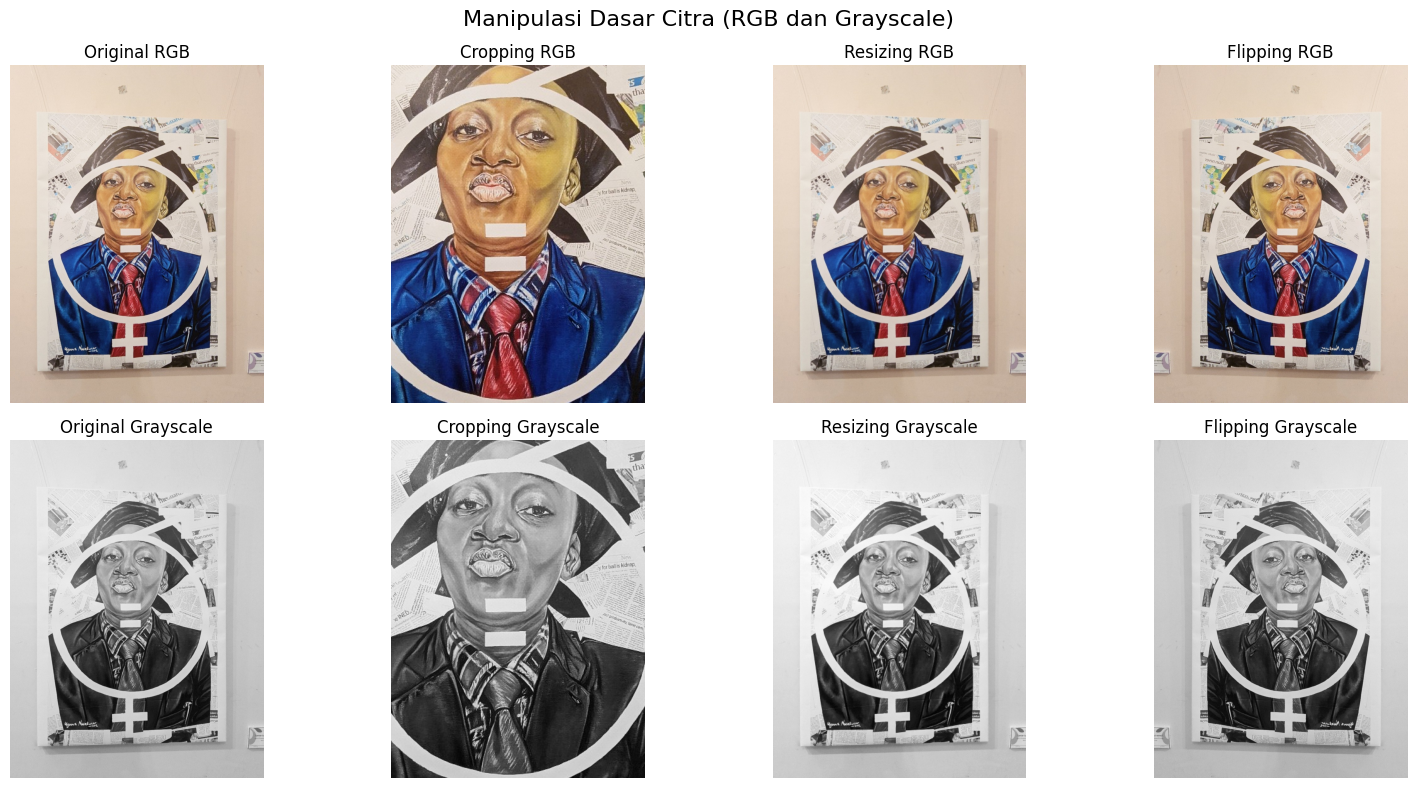


--------------------------------------------------------------------------------
Eksplorasi Program Selesai.


In [ ]:
def main():
    # Tentukan path file citra (sesuaikan jika perlu)
    path_citra = r"C:\Users\Pongo\Desktop\kuliah\Semester 4\Pengolahan Citra Digital\minggu 1\program\src\img\speed_rafie_sample.jpg"

    print("EKSPLORASI DIGITALISASI CITRA")
    print("Dari Citra Analog ke Representasi Matriks dan Analisis Parameter")
    print("-"*80)

    # 1. Akuisisi dan Digitalisasi
    citra = muat_citra(path_citra)
    if citra is None:
        return

    # 2. Representasi Matriks dan Vektor (gunakan grayscale)
    grayscale = cv2.cvtColor(citra, cv2.COLOR_BGR2GRAY)
    tampilkan_matriks_vektor(grayscale)

    # 3. Analisis Parameter Citra
    params = analisis_parameter(citra)

    # 4. Skenario perubahan memori
    skenario_memori(params)

    # 5. Manipulasi Dasar dan Tampilan
    manipulasi_dan_tampilkan(citra)

    print("\n" + "-"*80)
    print("Eksplorasi Program Selesai.")

if __name__ == "__main__":
    main()